# Producer and consumer surplus illustrations

These are some illustrations I made for my Applied Calculus lecture on producer and consumer surpluses.

The code to move the axes (in the ``myaxes`` function) is from the SciPy Lecture Notes ```matplotlib``` tutorial, by Nicolas Rougier, Mike Müller, and Gaël Varoquaux, at <http://www.scipy-lectures.org/intro/matplotlib/index.html#moving-spines>, and is used under a Creative Commons Attribution 4.0 International License.

This document is Copyright 2016 Christopher L. Phan, and is licensed under a Creative Commons Attribution-ShareAlike 4.0 International License.

A copy of the license is available here: <http://creativecommons.org/licenses/by-sa/4.0/>

In [2]:
# Preliminaries

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def myaxes():
    # Following is (modified) from: 
    # http://www.scipy-lectures.org/intro/matplotlib/index.html#moving-spines
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    plt.grid(True)
    plt.tight_layout()
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    if ymin > 0:
        yaxis_loc = 0
    else:
        yaxis_loc = abs(ymin)/(ymax - ymin)
    if xmin > 0:
        xaxis_loc = 0
    else:
        xaxis_loc = abs(xmin)/(xmax - xmin)
    ax.xaxis.set_label_coords(1, yaxis_loc)
    ax.yaxis.set_label_coords(xaxis_loc, 1)

## Plot 1: Producer and consumer surplus under equilibrium

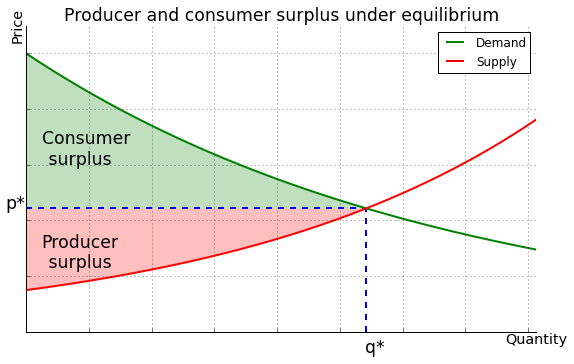

In [4]:
demand = lambda q: 10*np.exp(-0.03*q) # Demand curve (price as a function of quantity)
supply = lambda q: 1.5*np.exp(0.04*q) # Supply curve (price as a function of quantity)
  
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

# Find the equilibrium quantity and price
eq_quant = scipy.optimize.newton_krylov(lambda q: supply(q) - demand(q), 20)
eq_price = supply(eq_quant)

# Fill the producer and consumer surplus
xvals_fill = np.arange(0, eq_quant, 0.01)
yvals_fill_d = demand(xvals_fill)
yvals_fill_s = supply(xvals_fill)
plt.fill_between(xvals_fill, yvals_fill_d, eq_price, linewidth=0, alpha=0.25, color='g') # Consumer surplus
plt.fill_between(xvals_fill, yvals_fill_s, eq_price, linewidth=0, alpha=0.25, color='r') # Producer surplus

# Plot the dotted lines for equilibrium price and quantity
plt.plot([eq_quant, eq_quant], [0, eq_price], linewidth=2, linestyle='--', color='b')
plt.plot([0, eq_quant], [eq_price, eq_price], linewidth=2, linestyle='--', color='b')

# Graph the demand and supply curves 
# (We do this last, so they will be on top "layer")
xvals = np.arange(0, 1.6*eq_quant, 0.01)
yvals_d = demand(xvals)
yvals_s = supply(xvals)
plt.plot(xvals, yvals_d, linewidth=2, label="Demand", color='g')
plt.plot(xvals, yvals_s, linewidth=2, label="Supply", color='r')
plt.xlim(0, eq_quant*1.5)
plt.ylim(0, demand(0)*1.1 )
plt.xlabel("Quantity", fontsize='x-large')
plt.ylabel("Price", fontsize='x-large')
myaxes()
plt.tick_params(axis='x', which='both', labelbottom='off')
plt.tick_params(axis='y', which='both', labelleft='off')

# Label regions
plt.text(eq_quant*0.05, (eq_price + demand(eq_quant/3))/2, "Consumer\n surplus", fontsize='xx-large')
plt.text(eq_quant*0.05, (eq_price + supply(eq_quant/3))*0.35, "Producer\n surplus", fontsize='xx-large')

# Label equilibirum price and quantity
plt.text(eq_quant, -0.75, "q*", fontsize='xx-large')
plt.text(-1.5, eq_price, "p*", fontsize='xx-large')

# Label supply and demand
ax = fig.gca()
ax.legend()
plt.title("Producer and consumer surplus under equilibrium", fontsize="xx-large")

# Make everything tight
plt.tight_layout()

## Plot 2: Equilibrium compared to an artificially low price

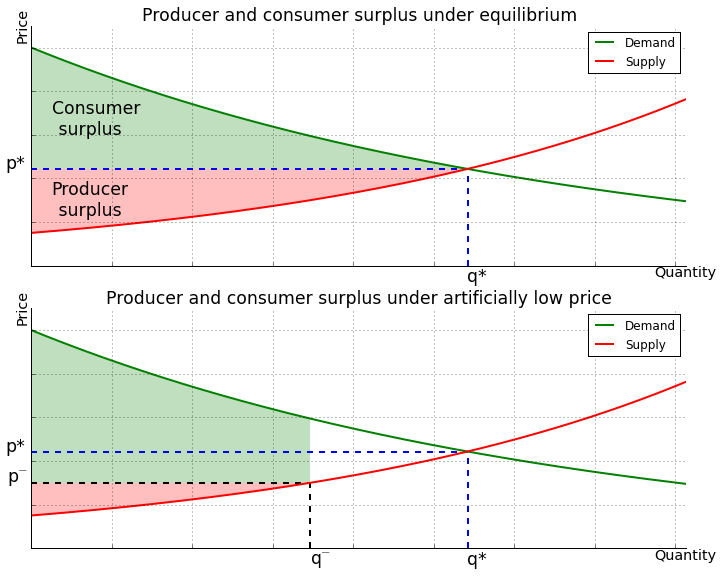

In [12]:
fig = plt.figure(figsize=(10, 8))

### Subplot 1: Equilibirum 

ax = fig.add_subplot(211)

# Fill the producer and consumer surplus
xvals_fill = np.arange(0, eq_quant, 0.01)
yvals_fill_d = demand(xvals_fill)
yvals_fill_s = supply(xvals_fill)
plt.fill_between(xvals_fill, yvals_fill_d, eq_price, linewidth=0, alpha=0.25, color='g') # Consumer surplus
plt.fill_between(xvals_fill, yvals_fill_s, eq_price, linewidth=0, alpha=0.25, color='r') # Producer surplus

# Plot the dotted lines for equilibrium price and quantity
plt.plot([eq_quant, eq_quant], [0, eq_price], linewidth=2, linestyle='--', color='b')
plt.plot([0, eq_quant], [eq_price, eq_price], linewidth=2, linestyle='--', color='b')

# Graph the demand and supply curves 
# (We do this last, so they will be on top "layer")
xvals = np.arange(0, 1.6*eq_quant, 0.01)
yvals_d = demand(xvals)
yvals_s = supply(xvals)
plt.plot(xvals, yvals_d, linewidth=2, label="Demand", color='g')
plt.plot(xvals, yvals_s, linewidth=2, label="Supply", color='r')
plt.xlim(0, eq_quant*1.5)
plt.ylim(0, demand(0)*1.1 )
plt.xlabel("Quantity", fontsize='x-large')
plt.ylabel("Price", fontsize='x-large')
myaxes()
plt.tick_params(axis='x', which='both', labelbottom='off')
plt.tick_params(axis='y', which='both', labelleft='off')

# Label regions
plt.text(eq_quant*0.05, (eq_price + demand(eq_quant/3))/2, "Consumer\n surplus", fontsize='xx-large')
plt.text(eq_quant*0.05, (eq_price + supply(eq_quant/3))*0.35, "Producer\n surplus", fontsize='xx-large')

# Label equilibirum price and quantity
plt.text(eq_quant, -0.75, "q*", fontsize='xx-large')
plt.text(-1.5, eq_price, "p*", fontsize='xx-large')

# Label supply and demand
ax = fig.gca()
ax.legend()
plt.title("Producer and consumer surplus under equilibrium", fontsize="xx-large")

##### Subplot 2: Artificially low price

ax = fig.add_subplot(212)

# Find the equilibrium quantity and price
art_low_price = 3
art_low_quant = scipy.optimize.newton_krylov(lambda q: supply(q) - art_low_price, 20)

# Fill the producer and consumer surplus
xvals_fill = np.arange(0, art_low_quant, 0.01)
yvals_fill_d = demand(xvals_fill)
yvals_fill_s = supply(xvals_fill)
plt.fill_between(xvals_fill, yvals_fill_d, art_low_price, linewidth=0, alpha=0.25, color='g') # Consumer surplus
plt.fill_between(xvals_fill, yvals_fill_s, art_low_price, linewidth=0, alpha=0.25, color='r') # Producer surplus

# Plot the dotted lines for equilibrium price and quantity
plt.plot([eq_quant, eq_quant], [0, eq_price], linewidth=2, linestyle='--', color='b')
plt.plot([0, eq_quant], [eq_price, eq_price], linewidth=2, linestyle='--', color='b')

# Plot the dotted lines for new price and quantity
plt.plot([art_low_quant, art_low_quant], [0, art_low_price], linewidth=2, linestyle='--', color='k')
plt.plot([0, art_low_quant], [art_low_price, art_low_price], linewidth=2, linestyle='--', color='k')

# Graph the demand and supply curves 
# (We do this last, so they will be on top "layer")
xvals = np.arange(0, 1.6*eq_quant, 0.01)
yvals_d = demand(xvals)
yvals_s = supply(xvals)
plt.plot(xvals, yvals_d, linewidth=2, label="Demand", color='g')
plt.plot(xvals, yvals_s, linewidth=2, label="Supply", color='r')
plt.xlim(0, eq_quant*1.5)
plt.ylim(0, demand(0)*1.1 )
plt.xlabel("Quantity", fontsize='x-large')
plt.ylabel("Price", fontsize='x-large')
myaxes()
plt.tick_params(axis='x', which='both', labelbottom='off')
plt.tick_params(axis='y', which='both', labelleft='off')


# Label equilibirum price and quantity
plt.text(eq_quant, -0.75, "q*", fontsize='xx-large')
plt.text(-1.5, eq_price, "p*", fontsize='xx-large')

# Label new price and quantity
plt.text(art_low_quant, -0.75, "q${}^-$", fontsize='xx-large')
plt.text(-1.5, art_low_price, "p${}^-$", fontsize='xx-large')

# Label supply and demand
ax = fig.gca()
ax.legend()
plt.title("Producer and consumer surplus under artificially low price", fontsize="xx-large")

# Make everything tight
plt.tight_layout()

## Plot 3: Equilibrium compared to an artificially high price

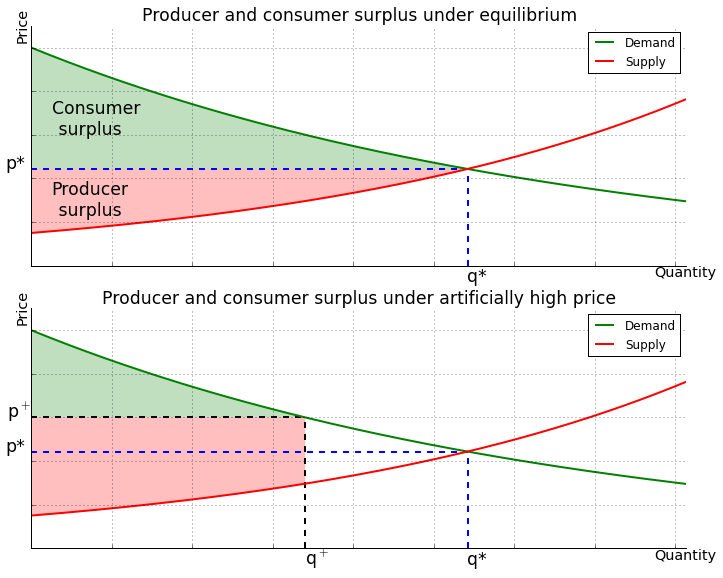

In [10]:
fig = plt.figure(figsize=(10, 8))

### Subplot 1: Equilibirum 

ax = fig.add_subplot(211)

# Fill the producer and consumer surplus
xvals_fill = np.arange(0, eq_quant, 0.01)
yvals_fill_d = demand(xvals_fill)
yvals_fill_s = supply(xvals_fill)
plt.fill_between(xvals_fill, yvals_fill_d, eq_price, linewidth=0, alpha=0.25, color='g') # Consumer surplus
plt.fill_between(xvals_fill, yvals_fill_s, eq_price, linewidth=0, alpha=0.25, color='r') # Producer surplus

# Plot the dotted lines for equilibrium price and quantity
plt.plot([eq_quant, eq_quant], [0, eq_price], linewidth=2, linestyle='--', color='b')
plt.plot([0, eq_quant], [eq_price, eq_price], linewidth=2, linestyle='--', color='b')

# Graph the demand and supply curves 
# (We do this last, so they will be on top "layer")
xvals = np.arange(0, 1.6*eq_quant, 0.01)
yvals_d = demand(xvals)
yvals_s = supply(xvals)
plt.plot(xvals, yvals_d, linewidth=2, label="Demand", color='g')
plt.plot(xvals, yvals_s, linewidth=2, label="Supply", color='r')
plt.xlim(0, eq_quant*1.5)
plt.ylim(0, demand(0)*1.1 )
plt.xlabel("Quantity", fontsize='x-large')
plt.ylabel("Price", fontsize='x-large')
myaxes()
plt.tick_params(axis='x', which='both', labelbottom='off')
plt.tick_params(axis='y', which='both', labelleft='off')

# Label regions
plt.text(eq_quant*0.05, (eq_price + demand(eq_quant/3))/2, "Consumer\n surplus", fontsize='xx-large')
plt.text(eq_quant*0.05, (eq_price + supply(eq_quant/3))*0.35, "Producer\n surplus", fontsize='xx-large')

# Label equilibirum price and quantity
plt.text(eq_quant, -0.75, "q*", fontsize='xx-large')
plt.text(-1.5, eq_price, "p*", fontsize='xx-large')

# Label supply and demand
ax = fig.gca()
ax.legend()
plt.title("Producer and consumer surplus under equilibrium", fontsize="xx-large")



##### Subplot 2: Artificially high price

ax = fig.add_subplot(212)

# Find the equilibrium quantity and price
art_high_price = 6
art_low_quant = scipy.optimize.newton_krylov(lambda q: demand(q) - art_high_price, 20)

# Fill the producer and consumer surplus
xvals_fill = np.arange(0, art_low_quant, 0.01)
yvals_fill_d = demand(xvals_fill)
yvals_fill_s = supply(xvals_fill)
plt.fill_between(xvals_fill, yvals_fill_d, art_high_price, linewidth=0, alpha=0.25, color='g') # Consumer surplus
plt.fill_between(xvals_fill, yvals_fill_s, art_high_price, linewidth=0, alpha=0.25, color='r') # Producer surplus

# Plot the dotted lines for equilibrium price and quantity
plt.plot([eq_quant, eq_quant], [0, eq_price], linewidth=2, linestyle='--', color='b')
plt.plot([0, eq_quant], [eq_price, eq_price], linewidth=2, linestyle='--', color='b')

# Plot the dotted lines for new price and quantity
plt.plot([art_low_quant, art_low_quant], [0, art_high_price], linewidth=2, linestyle='--', color='k')
plt.plot([0, art_low_quant], [art_high_price, art_high_price], linewidth=2, linestyle='--', color='k')

# Graph the demand and supply curves 
# (We do this last, so they will be on top "layer")
xvals = np.arange(0, 1.6*eq_quant, 0.01)
yvals_d = demand(xvals)
yvals_s = supply(xvals)
plt.plot(xvals, yvals_d, linewidth=2, label="Demand", color='g')
plt.plot(xvals, yvals_s, linewidth=2, label="Supply", color='r')
plt.xlim(0, eq_quant*1.5)
plt.ylim(0, demand(0)*1.1 )
plt.xlabel("Quantity", fontsize='x-large')
plt.ylabel("Price", fontsize='x-large')
myaxes()
plt.tick_params(axis='x', which='both', labelbottom='off')
plt.tick_params(axis='y', which='both', labelleft='off')


# Label equilibirum price and quantity
plt.text(eq_quant, -0.75, "q*", fontsize='xx-large')
plt.text(-1.5, eq_price, "p*", fontsize='xx-large')

# Label new price and quantity
plt.text(art_low_quant, -0.75, "q${}^+$", fontsize='xx-large')
plt.text(-1.5, art_high_price, "p${}^+$", fontsize='xx-large')

# Label supply and demand
ax = fig.gca()
ax.legend()
plt.title("Producer and consumer surplus under artificially high price", fontsize="xx-large")

# Make everything tight
plt.tight_layout()